In [1]:
import numpy as np
import pandas as pd

In [23]:
avocado = pd.read_csv('avocado.csv')

In [24]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [25]:
avocado.shape

(18249, 14)

In [26]:
#cek apakah data ada yang null
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [27]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [28]:
#pembersihan database
#dengan menghilangkan index di data avocado
avocado.drop("Unnamed: 0", axis=1,inplace=True)

In [29]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [30]:
#ubah nama 4046, 4225, dan 4770
# 4046 - total angka avocado dengan PLU 4046 yang terjual
# 4225 - total angka avocado dengan PLU 4225 yang terjual
# 4770 - total angka avocado dengan PLU 4770 yang terjual
#renaming columns for better understanding
avocado.rename(columns={'4046':'Small HASS sold',
                          '4225':'Large HASS sold',
                          '4770':'XLarge HASS sold'}, 
                 inplace=True)

In [31]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [32]:
#disini kami membagi dari kolom type, awalnya di drop (dummies)
#lalu di pishkan menjadi 
# avocado = pd.get_dummies(avocado, columns=['type'],drop_first=False)
# avocado.head()
#kalo jadi 1 type tapi datanya 2 bisa pakai ini
avocado = pd.get_dummies(avocado, columns=['type'],drop_first=True)
avocado.head()

#docs
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,0


In [34]:
print("Organic ",avocado[avocado["type_organic"]==1]["Date"].count())
print("conventional ",avocado[avocado["type_organic"]==0]["Date"].count())

Organic  9123
conventional  9126


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns figure solved by
# https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

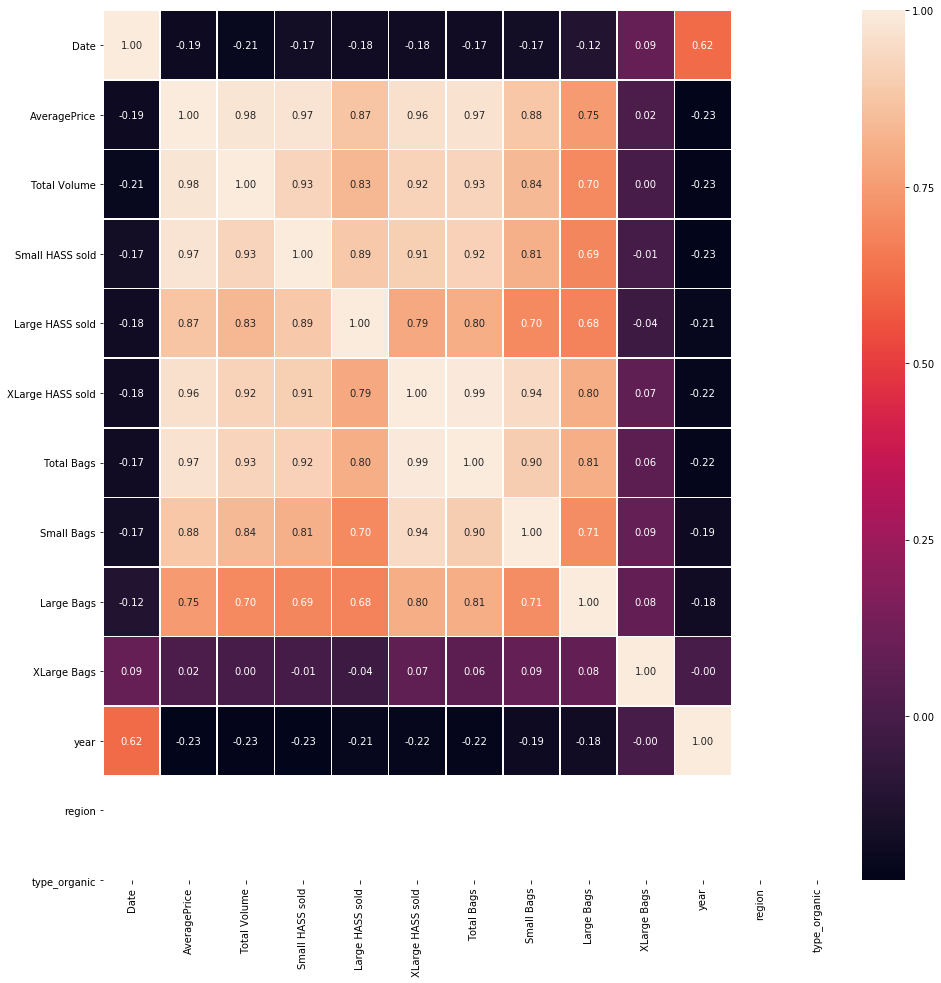

In [72]:
fig, ax = plt.subplots(figsize=(16,16)) #untuk memperbesar size pakai figure
coe_col = avocado.columns
cm = avocado.corr()
ax = sns.heatmap(cm,cbar = True, annot = True,square = False, fmt = '.2f', annot_kws = {'size':10}, yticklabels = coe_col, 
                 xticklabels = coe_col,linewidths=.5, ax=ax )

#cm, bar artinya bar nilai yang dari 0 - 1.0
#annot artinya nilai corelasi yang muncul
#square yang bentuknya
#fmt itu berapa angka belakang koma yang muncul
# annot_kws ukuran fontnya untuk annot
# yticklabels xticklabels itu x y nya
#linewidht lebar linennya
# ax itu ukurang nya diatur lewat plt

In [75]:
# avocado['type_organic'].sample(5)

9350     1
13947    1
13291    1
16282    1
2127     0
Name: type_organic, dtype: uint8

berdasarkan plot diatas, maka dapat dilihat data2 tersebut untuk AverangePrice memiliki korelasi yang tinggi terhadap Total Volume, Small HASS Sold, Large HASS, Sold, XLarge HASS Sold, Total Bags, Small bags, Large Bags

## Visualisasikan data

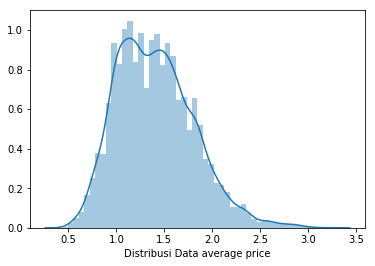

In [77]:
#Rata Harga
sns.distplot(avocado["AveragePrice"],axlabel="Distribusi Data average price")

Rata-rata harga rata-rata berkisar antara 1,0 hingga 1,7

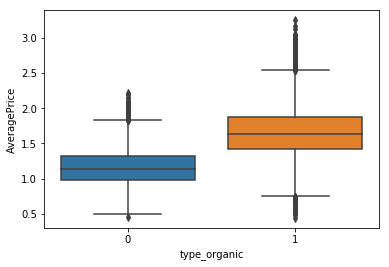

In [79]:
#Perbandingan harga orgnik dan konvensioanl
sns.boxplot(x="type_organic", y="AveragePrice", data=avocado)

Alpukat organik(1) lebih mahal daripada yang konvensional(0)

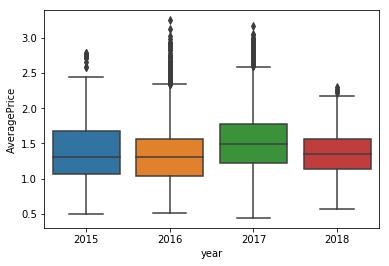

In [80]:
# rata2 setiap tahun
sns.boxplot(x="year", y="AveragePrice", data=avocado)

Kami perhatikan harga rata-rata di tahun 2017 tinggi dibandingkan tahun-tahun lainnya

## Classification

In [82]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year', 'region', 'type_organic'],
      dtype='object')

In [85]:
avocado_new=avocado[["AveragePrice","Total Volume", "Small HASS sold",
       "Large HASS sold", "XLarge HASS sold", "Total Bags", "Small Bags",
       "Large Bags", "XLarge Bags","type_organic","Total Bags"]]

#feature columns
X=avocado_new[["AveragePrice","Total Volume", "Small HASS sold",
       "Large HASS sold", "XLarge HASS sold", "Total Bags", "Small Bags",
       "Large Bags", "XLarge Bags","Total Bags"]] 

#predictor variable
Y=avocado_new.type_organic

## Training

In [86]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=42)
#disini digunakan untuk membagi data test dan training
# data testnya 20% dan trainingnya 80%
#dengan random state nya 42

### Support Vector Classifier

In [87]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(train_x,train_y)
#metode svm 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
pred_y = clf.predict(test_x)
print(pred_y)

[0 0 1 ... 0 1 1]


In [91]:
# print(test_y) #terlalu banyak

In [98]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,pred_y)
print(score)
#metode svm menghasilkan akurasi sebnyak 89,9% untuk data avocado

0.8991780821917809


In [99]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

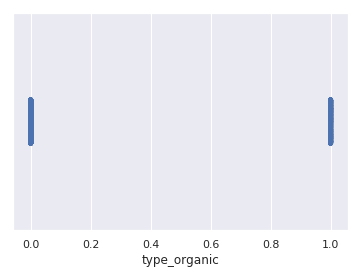

In [100]:
ax = sns.stripplot(x=test_y)

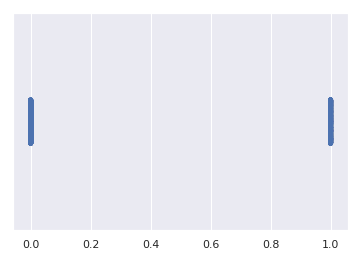

In [101]:
ax = sns.stripplot(x=pred_y)

### K Nearest Neighbors Classifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [103]:
pred_ynn = neigh.predict(test_x)
print(pred_ynn)

[0 0 1 ... 0 1 1]


In [105]:
# print(test_y) #jangan terlalu banyak

In [106]:
score = accuracy_score(test_y,pred_ynn)
print(score)
#berbeda hasil dengan metode svm, knn justru mendapat hasil yang lebih bagus yaotu sekitar 97.2 %

0.9726027397260274


## dari clasifikasi menggunakan 2 metode diatas yang dimana untuk SVM mendapat 89,9 % dan KNN dengan 97.2 % bisa ambil kesimpulan untuk klasifikasi dataset avocado lebih bagus dengan metode KNN